> ### EEE2020: Data Structures & Algorithms

# Assignment \#  II: Basic Data Structure

<div style="text-align: right"> **Due date: April 9, 2021.** </div> 
<div style="text-align: right"> **Please upload your file @ LearnUs by 7 PM.** </div> 
<br>
<div style="text-align: right"> Daesung Jeon(전대성): <a href="mailto:ds.jeon@yonsei.ac.kr">ds.jeon@yonsei.ac.kr</a> 
<div style="text-align: right"> Hyekang Park(박혜강): <a href="mailto:hyekang.park@yonsei.ac.kr">hyekang.park@yonsei.ac.kr</a> </div>
</div>

-------------------------------


### *Assignment Instructions:*
1. Write a program implementing a particular algorithm to solve a given problem.
2. You can use both Korean and Engligh for your report.
3. **Analyze the algorithm theoretically and empirically, and write discussion.** 
4. **Report your results.**  
    - You must do assignments and labs yourself. 
    - <span style="color:red">**Do not copy any part of your friends’ code.**</span>
    - Otherwise, you will get a F grade.

-----------------

<h2><span style="color:blue">[Insert your ID HERE] [Insert your name HERE]</span> </h2>

In [1]:
import datetime

print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-04-09 17:45:36.712317


## PROBLEM I - Stack & Queue (15 POINTS)

1. 미리 구현된 Stack 2개를 이용하여 Queue를 구현하시오.
2. 미리 구현된 Queue 2개를 이용하여 Stack을 구현하시오.


### Conditions
1. 주어진 자료 구조 이외의 것(e.g. list)을 사용하지 않는다.
2. ```Queue_new``` 와 ```Queue```은 같은 수와 이름의 method를 갖는다.
3. ```Stack_new``` 와 ```Stack```은 같은 수와 이름의 method를 갖는다.
4. ```Queue_new``` 와 ```Queue```의 ```self.dequeue()```는 ```self.is_empty() == True```인 경우 error가 발생한다.
5. ```Stack_new``` 와 ```Stack```의 ```self.pop()```는 ```self.is_empty() == True```인 경우 error가 발생한다.


### HINT
1. 스택은 LIFO 구조를 가짐. 그러므로, data를 **온전히** push하고 pop하는 과정을 **2번** 거치면 원래의 순서로 출력 가능.
2. 큐는 FIFO 구조를 가짐. 그러므로, 거꾸로 출력하기 위해서는 **처음부터** 거꾸로 넣어야함. ```a, b = b, a```(swap)을 이용.
    > **For example**,  
    > push(1) : [1] [0] -> [0] [1]  
    > push(2) : [2] [1] -> [1 2] [0] -> [0] [1 2]  
    > push(3) : [3] [1 2] -> [1 2 3] [0] -> [0] [1 2 3]  
    > pop()  : [0] [1 2]
    

### NOTE
- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.

In [2]:
class Queue:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0, item)

    def dequeue(self):
        assert not self.is_empty()
        return self.items.pop()

    def size(self):
        return len(self.items)


class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        assert not self.is_empty()
        return self.items.pop()

    def size(self):
        return len(self.items)

In [3]:
class Queue_new:
    def __init__(self):
        self.stack1 = Stack()
        self.stack2 = Stack()
    
    def is_empty(self): #enqueue, dequeue를 할 때 stack 1만을 이용할 것이므로 stack1.is_empty()를 반환해준다.
        return self.stack1.is_empty()
    
    def enqueue(self, item): #stack1에 item을 넣어준다. stack과 queue의 모양은 다르지 않으므로 그냥 push를 사용해주었다.
        self.stack1.push(item)

    def dequeue(self):
        assert not self.is_empty()
        while not self.stack1.is_empty():
            self.stack2.push(self.stack1.pop())
        num = self.stack2.pop() #Queue_new의 dequeue를 실행하면 self.stack2.pop()한 값을 return해주어야 하는데 아직 실행할 코드가 남아있다
        while not self.stack2.is_empty(): 
            self.stack1.push(self.stack2.pop())
        return num #num=self.stack2.pop()이라는 num을 만들어 코드 실행 마지막에 이 값을 return해주었다.  
    
        #stack과 queue의 가장 큰 차이는 출력이 LIFO이냐 FIFO이냐의 차이이다. 기존에 stack1에 넣어놨던 값들을 stack2로 모두 옮기고
        #item하나를 출력한다. 이후 stack2에 있던 값들을 다시 stack1으로 옮기면 원래대로 돌아오게 된다.
        
    def size(self):
        return self.stack1.size() #Stack만을 이용해 queue를 구현해야 하므로 len대신 size를 사용했다.
    

class Stack_new:
    def __init__(self):
        self.queue1 = Queue()
        self.queue2 = Queue()

    def is_empty(self):
        return self.queue2.is_empty() #items를 항상 queue2에 저장할 것이므로 queue2가 비어있나만 확인한다.

    def push(self, item):
        self.queue1.enqueue(item) #일단 비어있는 queue1에 item을 넣는다.
        while not self.queue2.is_empty():
            self.queue1.enqueue(self.queue2.dequeue())
            #queue2에 있는 item을 모두 queue1으로 옮기면 item이 queue의 맨 앞에 오게되어 stack같은 입력이 가능하다
        while not self.queue1.is_empty(): #queue1이 빌 때까지
            self.queue2.enqueue(self.queue1.dequeue()) #queue1에 있는 item을 모두 queue2로 옮기면 queue2는 기존queue1과 동일하고
            #queue1은 다시 비어있는 상태로 유지된다.

    def pop(self):
        assert not self.is_empty() #비어있을 때는 pop() 을 쓸 수 없다.
        return self.queue2.dequeue() #item을 넣을 때 거꾸로 넣어주었으므로 그냥 출력해주면 거꾸로 나온다.

    def size(self):
        return self.queue2.size() #모든 item은 queue2에 저장될 것이므로 queue2의 사이즈만 보면 된다.

### Demo code

In [4]:
s = Stack()
s_new = Stack_new()
q = Queue()
q_new = Queue_new()

In [5]:
for i in range(10):
    s.push(i)
    s_new.push(i)

for _ in range(10):
    print(f"s => {s.pop()} | s_new => {s_new.pop()}")
    print(f"size of s : {s.size()} | size of s_new : {s_new.size()}")
    print(f"-" * 40)

s => 9 | s_new => 9
size of s : 9 | size of s_new : 9
----------------------------------------
s => 8 | s_new => 8
size of s : 8 | size of s_new : 8
----------------------------------------
s => 7 | s_new => 7
size of s : 7 | size of s_new : 7
----------------------------------------
s => 6 | s_new => 6
size of s : 6 | size of s_new : 6
----------------------------------------
s => 5 | s_new => 5
size of s : 5 | size of s_new : 5
----------------------------------------
s => 4 | s_new => 4
size of s : 4 | size of s_new : 4
----------------------------------------
s => 3 | s_new => 3
size of s : 3 | size of s_new : 3
----------------------------------------
s => 2 | s_new => 2
size of s : 2 | size of s_new : 2
----------------------------------------
s => 1 | s_new => 1
size of s : 1 | size of s_new : 1
----------------------------------------
s => 0 | s_new => 0
size of s : 0 | size of s_new : 0
----------------------------------------


In [6]:
# error
s.pop()

AssertionError: 

In [7]:
# error
s_new.pop()

AssertionError: 

In [8]:
print(f"s is empty? [{s.is_empty()}] | s_new is empty? [{s_new.is_empty()}]")

s is empty? [True] | s_new is empty? [True]


In [9]:
for i in range(10):
    q.enqueue(i)
    q_new.enqueue(i)

for _ in range(10):
    print(f"q=> {q.dequeue()} | q_new => {q_new.dequeue()}")
    print(f"size of q : {q.size()} | size of q_new : {q_new.size()}")
    print(f"-" * 40)

q=> 0 | q_new => 0
size of q : 9 | size of q_new : 9
----------------------------------------
q=> 1 | q_new => 1
size of q : 8 | size of q_new : 8
----------------------------------------
q=> 2 | q_new => 2
size of q : 7 | size of q_new : 7
----------------------------------------
q=> 3 | q_new => 3
size of q : 6 | size of q_new : 6
----------------------------------------
q=> 4 | q_new => 4
size of q : 5 | size of q_new : 5
----------------------------------------
q=> 5 | q_new => 5
size of q : 4 | size of q_new : 4
----------------------------------------
q=> 6 | q_new => 6
size of q : 3 | size of q_new : 3
----------------------------------------
q=> 7 | q_new => 7
size of q : 2 | size of q_new : 2
----------------------------------------
q=> 8 | q_new => 8
size of q : 1 | size of q_new : 1
----------------------------------------
q=> 9 | q_new => 9
size of q : 0 | size of q_new : 0
----------------------------------------


In [10]:
# error
q.dequeue()

AssertionError: 

In [11]:
# error
q_new.dequeue()

AssertionError: 

In [12]:
print(f"q is empty? [{q.is_empty()}] | q_new is empty? [{q_new.is_empty()}]")

q is empty? [True] | q_new is empty? [True]


### Describe and Discuss your answer: 

Stack의 경우 모든 숫자를 순서대로넣었다가 출력하면 순서가 거꾸로 뒤집히게 되는데, 이 과정을 두번 반복하면 처음 입력한 순서 그대로 출력을 하는 것이 가능하다. 사실 is_empty나 size 등은 자료들의 크기에만 의존하며, Stack과 Queue의 가장 큰 차이는 일단 item을 넣은 이후, 출력으로 나오는 item들의 순서가 어떻냐는 것이다.
이에 두개의 stack을 이용해 queue를 만들 때 주요기능을 stack1에 의존하여 짰으며 stack2는 stack1에 들어있는 item들을 queue의 dequeue처럼 출력해주는 것을 도와주는 용도의 stack으로 사용하였다.
Queue_new의 dequeue()를 실행할 때는 self.stack2.pop()을 하나 빼 준 이후 다시 숫자들을stack1으로 옮겨 주어야 한다. 이 때문에 해당 값을 바로
return할 수 없어서 일단 num=self.stack2.pop()을 사용해주고 숫자들을 모두 stack1으로 옮긴 다음에 이 num값을 return해주도록 하였다.




사실 Queue_new를 짜면서 고민을 매우 많이했었다. 내가 처음 생각한 queue_new의 알고리즘은 두가지였다. 하나는 enqueue에서부터 아예 item을 queue와 같은 모양으로 정렬해서 넣어주고 dequeue를 실행할 때 단순히 self.stack1.pop()을 시켜주는 것이었고, 나머지 하나는 enqueue에서 단순히 item을 넣어주고 dequeue를 실행할 때 item들을 모두 stack2로 옮긴 후 pop을 해주는 것이었다.

전자의 경우는 item들이 list의 왼쪽으로 들어가서 오른쪽으로 나오는 형태로 구현한 queue이고 queue_new의 stack1.items의 모양이 queue의 items의 모양과 동일하게 배열이 된다. 반면 후자의 경우 item들이 list의 오른쪽으로 들어가 왼쪽으로 나오는 형태이고 이 경우 stack1.items를 출력하면 미리 구현되어 있는 queue와는 뒤집힌 방향으로 item들이 배열되어 있다.

처음 뒤의 알고리즘을 이용해 Queue_new를 짠 이후, 혹시 item들의 배열이 거꾸로 되어있는 것이 감점요인이 될 까봐 첫 번째 코드로 수정해 올리려고 했다. 반면 시간을 가지고 다시 생각해 본 결과, 교수님께서 Stack이나 Queue는 추상적인 개념이므로 입출력 방향이 중요하지 않다고 말씀하신 적이 있고, hint에 나와있는 설명(item을 온전히 넣었다가 온전히 빼는 과정을 두번하면 원래 순서대로 출력이 가능하다)은 내가 짠 알고리즘에 더 어울리는 설명이라고 생각했다. (예를 들어 1~4까지의 4개의 숫자를 넣을때, enqueue에서 이미 배열을 바꾸어서 넣어버리는 것보다 enqueue에서 item을 그대로 넣고 dequeue에서 stack2를 거치는 것이 '온전히 item을 넣었다가 출력하는 것을 두번 반복한다'는 설명에 더 잘 어울리는 알고리즘이다.)
그래서 코드는 수정하지 않고 대신 item이 거꾸로 배열된 Queue_new는 의도한 코드라는 것을 알리기 위해 discription에 이런 내용을 서술하기로 하였다. 이에 enqueue에서는 단순히 stack1.push()를 이용하고 dequeue에서 stack2의 도움을 받아 item들을 출력하는 방식으로 Queue_new를 구현해 최종 제출한다. 




Stack_new의 알고리즘은 이와 다르다. FIFO를 LIFO로 바꾸기 위해서는 처음부터 item을 거꾸로 넣어주어야 하기 때문에 push()를 짤 때 item을 거꾸로 넣는 방법을 생각해야 했다. 나는 이를 구현하기 위해
1. queue1에 item을 넣는다.
2. queue2에 기존에 item이 들어있다면 거기에 있는 item들을 모조리 나머지 한쪽으로 옮긴다.
3. queue1에 있는 item을 모조리 queue2에 enqueue()한다.


는 3단계의 알고리즘을 통해 이를 구현하였다. [][] 비어있는 두 queue가 있을 때 여기에 1,2,3을 넣는다고 치면
[1][]->[][1]
,[2][1]->[12][]->[][12]
,[3][12]->[123][]->[][123]

이런 식으로 숫자가 배열된다. 처음부터 배열이 거꾸로 되었기 때문에 Stack_new.pop()을 실행하면 내부 queue2의 dequeue()가 그대로 실행되어도
stack의 pop()과 동일한 순서로 출력이 가능하다.

-------------------------------

### PROBLEM 2 - Algorithm using stacks (20 POINTS)

정렬이 되지 않은 리스트를 입력으로 받은 뒤 2개의 stack을 이용하여 오름차순으로 정렬하여 반환하는 함수를 구현하시오.  
```sorted_list = sort_by_stack(list)```

### Conditions
정렬하는 동안 주어진 자료 구조 이외의 것(e.g. list)을 사용하지 않는다.


### NOTE

- 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 알고리즘이 어떻게 동작하는지 설명한다.

In [13]:
class Stack:
    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        assert not self.is_empty()
        return self.items.pop()

    def size(self):
        return len(self.items)
    
    def peek(self):
        return self.items[-1]
    

def sort_by_stack(a_list):
    stack1 = Stack()
    stack2 = Stack()
    for i in a_list:
        stack1.push(i)
        
    while not stack1.is_empty(): #stack1이 빌 때까지 시행해준다.
        num=stack1.pop() 
        if stack2.is_empty(): #stack 2가 비어있으면 일단 item을 하나 넣어준다.
            stack2.push(num)
        else: #stack2에 item이 있을 경우
            while stack2.is_empty()==False and stack2.peek()>num: #stack2의 꼭대기에 있는 수가 stack1.pop보다 크면
                stack1.push(stack2.pop())#peek에 있는 수를 빼서 stack1에 넣어버린다. 이를 peek가 num보다 작거나 stack2가 빌 때까지 반복한다.
            stack2.push(num) #while문이 끝나서 stack2에서 수가 충분히 빠지면 num을 넣는다.
    
    return stack2.items

a = [4, 2, 1, 3 ,7, 9]
a_sorted = sort_by_stack(a)
print(a_sorted)        
    

[1, 2, 3, 4, 7, 9]


### Describe and Discuss your answer: 

일단 숫자가 들어오면 stack1에 모두 넣는것으로 시작하였는데, 이 부분의 코드는 기본으로 제공되어 수정할 수 없었다. 이를 이용해서 코드를 짜기 위해 내가 생각한 알고리즘은 다음과 같다.
stack1에 들어가 있는 숫자배열을 stack2로 하나씩 옮기면서, 기존에 stack2.peek()가 stack1에서 pop()되어 새로 들어오는 숫자보다 큰 경우 해당 숫자는 빼서 stack1에 다시 넣는 것이다. 이렇게 stack2에서 숫자를 하나씩 빼다가 stack2가 비거나 stack2.peek()<=num이 되면 stack2에 num을 넣어준다.

이 알고리즘대로면 일단 어떤 숫자를 기준으로, 자신보다 왼쪽에 자신보다 큰 숫자는 올 수 없게 된다. 또한 stack2에 있던 자신보다 큰 숫자들은 빠져서 stack1으로 돌아가는데, 결국 stack1에서 다시 stack2로 이 숫자들을 넣어주고, 이를 stack1이 완전히 빌 때까지 반복하기 때문에 바깥쪽 while문이 끝나는 시점에서 모든 숫자는 stack2에 들어가게 된다.

어떤 숫자를 기준으로 왼쪽에는 해당 숫자보다 작거나 같은 숫자들 밖에 존재하지 않고, 모든 숫자들이 stack2에 들어와야 하므로 이를 동시에 만족할 경우 숫자들은 오름차순으로 정렬되게 된다. 실제로 출력값을 확인한 결과 오름차순으로 정렬되어 있음을 알 수 있다.

출력값은 배열에 담긴 형태를 띠고 있는데, stack2.items를 return해주면 이런 형태로 출력이 가능하다.


if stack2.is_empty()에서 stack이 비어있지 않아 else로 걸러져서 내려왔음에도 else문 안의 while문 조건에 stack2.is_empty()==False가 또 있는 것이 직관적으로 이상할 수 있다. 반면 while문 안에서 pop()이 돌아가기 때문에 이 조건을 사용하지 않으면 이 과정에서 stack2가 모두 비어있는데 stack2.peek()와 num을 비교하는 상황이 생겨 오류가 발생할 수 있다. 이를 방지하기 위해 stack2가 비어있으면 while문의 조건에 stack2의 is_empty()와 관련된 내용을 한번 더 써준 것이다.

-------------------------------

## PROBLEM 3 - UnorderedList (65 POINTS)

### Version Control System (e.g. Git)

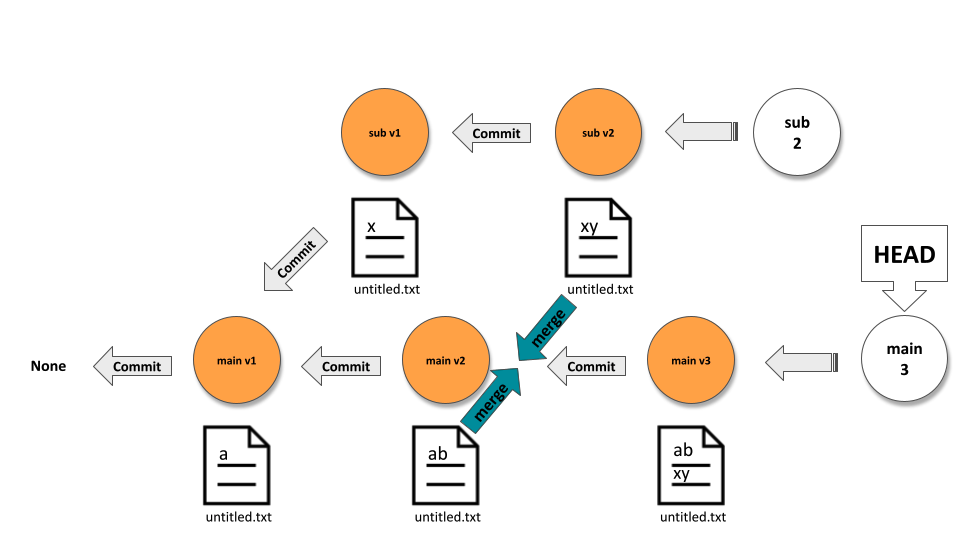

> **Version control system**이란 파일 변화를 시간에 따라 기록했다가 특정 시점의 버전을 다시 불러 올 수 있는 시스템을 칭함. 대표적으로 Git을 예로들 수 있으며, Git에 대한 설명은 다음 [링크](https://youtu.be/YFNQwo7iTNc) 참조. 본 과제는 **Unordered List**를 이용하여 1개 File에 대한 변화를 추적하고 저장할 수 있는 Simple git을 구현함.  

> *Hint* : 제일 먼저 Demo code와 출력 결과, 그림을 보고 전체적인 구조를 파악하는 것을 추천

> **브랜치(Branch):** 독립적으로 어떤 작업을 진행하기 위한 개념. 각각의 브랜치는 다른 브랜치의 영향을 받지 않기 때문에, 여러 작업을 동시에 진행 가능. 위 그림의 *main*, *sub*에 해당.  
> **버전(Version):** "버전"을 통해 변경 사항을 추적 및 저장. 위 그림의 *main v1, ..., main v3, sub v1, sub v2*에 해당.  
> **Head** : 현재 사용 중인 브랜치의 선두 부분. 기본적으로 *main* 브랜치의 선두 부분을 나타냄. **HEAD**를 이동하면, 사용하는 브랜치가 변경됨.


- **File** : 파일은 이름, 내용, 생성된 시간을 변수로 가지는 클래스
    - ```def __init__(self, name, content) ``` : File의 이름과 내용을 입력 받아 instance variable로 저장, 생성된 시간은 자동으로 instance variable로 저장. 
    - ```def __repr__(self)``` : ```__str__```과 마찬가지로 instance의 문자열 표현을 반환. 
    - ```def content(self)``` : get, set함수 대신 ```@property``` 라는 데코레이터를 이용하여 변수에 접근. [데코레이터에 대한 설명](https://dojang.io/mod/page/view.php?id=2427), [@property에 대한 설명](https://dojang.io/mod/page/view.php?id=2476). 이를 통해 instance variable에 대한 접근 제어 및 필요 동작 추가.  
    



- **Node** : Unordered list를 구성하는 노드. 역할에 따라 버전 노드와 브랜치 노드로 구분됨.
    - ```def __init__(self, name, data) ```
        - 버전 노드 : ```self.name```에는 해당 파일의 version이 저장되고 ```self.data```에는 ```File``` 클래스의 인스턴스가 저장됨.
        - 브랜치 노드 : ```self.name```에는 브랜치의 이름이, ```self.data```에는 해당 브랜치에 commit한 횟수가 저장되고 이름과 횟수가 곧 버전 노드의 ```self.name```에 사용됨.
    - ```self.prev``` : 다음 노드가 아닌 이전 노드를 가리킴. 인스턴스 생성 시 None값을 가짐.
    - 데코레이터를 이용하여 instance variable에 대한 접근을 설정. 
    
    

- **Simple_git**
    - ```def __init__(self)```
        - ```self.main``` : "main"의 이름을 가진 브랜치 노드를 할당.
        - ```self.head``` : ```self.main```을 할당. "main" 브랜치 노드를 현재 **사용 중임**을 뜻함.
        - ```self.history``` : 수정 이력을 저장하기 위한 빈 리스트를 할당. 
        
    - ```def checkout(self, branch_name)```: 사용 중인 브랜치 노드를 바꾼 후(```self.head```를 할당) 현재 사용 중인 브랜치 노드를 알려주는 메시지를 출력. 만약 해당 이름을 가진 브랜치 노드가 없을 시 에러 메시지를 출력.
    
    - ```def commit(self, file)``` : 사용 중인 브랜치 노드에 commit된 ```file```을 저장하는 버전 노드를 생성 후 추가. 버전 노드의 ```self.name```은 사용 중인 브랜치 노드의 ```self.name```과 ```self.data```값을 이용하여 작성(e.g. main v2). 추가한 뒤 사용 중인 브랜치 노드의 ```self.data``` 값을 1 증가시키고 ```self.history```에 commit한 내용을 추가.
    
    - ```def branch(self, branch_name)``` : ```self.name = branch_name```인 브랜치 노드를 instance variable로 생성. 생성된 브랜치 노드는 사용 중인 브랜치 노드가 가리키고 있는 버전 노드를 가리킨다. 사용 중인 브랜치 노드는 변하지 않음.
    
    - ```def reset(self)``` : 사용중인 브랜치 노드가 가리키는 최신 버전 노드를 삭제. 해당 브랜치 노드의 ```self.data```값을 1 낮추고 ```self.history```에 해당 내용을 추가.
    
    - ```def merge(self, src_branch, dst_branch)``` : 두 브랜치 노드의 최신 ```File```들의 ```content```를 합쳐 새로운 ```File```을 생성 후 ```commit```함. ```content```는 ```src_branch```의 것이 ```dst_branch```의 것 뒤에 줄바꿈을 한 뒤 합쳐짐. 또한, ```commit```할때 ```dst_branch```를 사용하고 그 후 ```self.history```에 merge에 관한 내용을 추가함. 단, "main" 브랜치 노드가 ```src_branch```가 될 수 없음.
    
    - ```def log(self)``` : ```self.history```에 추가한 수정 이력들을 차례대로 출력하고 현재 사용 중인 브랜치 노드의 이름을 출력.
    
    - ```def status(self, file)``` : 사용 중인 브랜치 노드의 최신 버전 ```File```의 ```content```와 input으로 받은 ```File```의 ```content```를 비교해 변화가 있는지 파악한 뒤 메시지를 출력.
    
    - ```def get_file(self,branch_name, version)``` : ```self.name = branch_name```인 브랜치 노드에서 해당 정수값의 ```version```을 가진 버전 노드를 찾아 일치하는 ```File```을 return함. 단, 사용 중인 브랜치 노드가 바뀌지 않으며 없는 경우 에러 메시지를 출력.  
    

**For example**
- 위 그림에서 흰색 동그라미는 브랜치 노드를 나타내고 주황색 동그라미는 버전 노드를 나타냄.
- **main** 브랜치 노드의 ```self.name```은 "main"이고 ```self.data```는 3이다.
- **sub v1** 버전 노드의 ```self.name```은 "sub v1"이고 ```self.data```는 File 클래스의 instance 이다.
- **Head**는 Simple_git 클래스의 ```self.head```를 나타내고 사용 중인 브랜치를 할당 받음(현재는 "main" 브랜치 노드).

### Conditions
- **Simple_git의 method들을 실행할 때 버전 노드들에 저장된 ```File```의 instance 변경 불가. (deepcopy 이용)**


### NOTE

- 명시된 라이브러리를 제외한 외부 라이브러리는 사용하지 않는다(사용 시 해당 문항 0점).
- ```###CODE HERE###``` 이외의 코드를 수정하지 않는다.
- ```###CODE HERE###``` 중 설명이 필요한 부분에 주석을 단다. 
- Discussion에 각 method를 어떤 식으로 구현했는지 설명한다.

### HINT
1. **f-string**: 파이썬 3.6부터 사용할 수 있는 string formatting mechanism이다. [참고 링크](https://realpython.com/python-f-strings/#reader-comments)
``` python
name = "Eric"
profession = "comedian"
affiliation = "Monty Python"
message = (
    f"Hi {name}. "
    f"You are a {profession}. "
    f"You were in {affiliation}."
)
>>> message
'Hi Eric. You are a comedian. You were in Monty Python.'
```



2. **hasattr, getattr, setattr** 사용 가능 [참고 링크](https://docs.python.org/ko/3.9/library/functions.html)
``` python
class ExampleClass:
        def __init__(self):
           self.tmp = [1, 2, 3, 4]
a = ExampleClass()
>>> getattr(a, 'tmp')
[1, 2, 3, 4]
>>> hasattr(a, 'tmp')
True
>>> hasattr(a, 'wow')
False
>>> setattr(a, 'wow', [3, 4, 5, 6])
>>> print(a.wow)
[3, 4, 5, 6]
```


3. **deepcopy(얕은 복사와 깊은 복사)** 사용 가능 [참고 링크](https://docs.python.org/ko/3/library/copy.html)  
    - 파이썬에는 포인터 개념이 없지만 내부적으로는 reference count & garbage collection이라는 방법으로 포인터를 활용한 메모리 관리가 구현되어 있다. 파이썬의 거의 모든 것은 어떤 class의 객체(instance)이고 대입연산으로 할당해주는 변수는 그 객체의 reference(포인터와 비슷하지만 다른 것)이라고 할 수 있다. 

``` python
from copy import copy, deepcopy
# 일반적인 대입연산은 같은 객체에 대한 reference count를 증가시킨다(같은 객체를 가리킨다).
a = [[1, 2, 3, 4], 4]
b = a
>>> print(id(a)==id(b))
True
# 얕은 복사는 새로운 객체를 생성하지만 그 안의 것들은 원본 객체를 가리키는 reference를 삽입한다.
c = copy(a)
>>> print(id(a) == id(c))
False
>>> print(id(a[0]) == id(c[0])) # 리스트안의 리스트는 같은 객체임을 알 수 있다.
True
>>> print(id(a[1]) == id(c[1]))
True
# 깊은 복사는 새로운 객체를 생성하고 재귀적으로 그 안의 객체들의 사본을 새로 생성한 객체에 삽입한다. 다만 불변객체에 대해서는 사본을 만들지 않는다. 
d = deepcopy(a)
>>> print(id(a) == id(d))
False
>>> print(id(a[0]) == id(d[0]))
False
>>> print(id(a[1]) == id(d[1])) # 정수, 실수, bool, tuple, string은 불변객체이다!
True
```

In [14]:
import datetime
from copy import deepcopy


class File:
    def __init__(self, name, content):
        assert isinstance(name, str)
        assert isinstance(content, str)
        self.name = name
        self.date = datetime.datetime.now()
        self.edit_date = self.date
        self.content = content

    def __repr__(self):
        return f"Filename : {self.name}\nContent : {self.content}\nGenerated at {self.date:%Y-%m-%d %H:%M:%S}, Edited at {self.edit_date:%Y-%m-%d %H:%M:%S}"

    @property
    def content(self):
        return self._content

    @content.setter
    def content(self, content):
        assert isinstance(content, str)
        self._content = content
        self.edit_date = datetime.datetime.now()
        print(f"{self.edit_date - self.date} pass after generation")

In [15]:
class Node:
    def __init__(self, name, data):
        assert isinstance(name, str)
        self.name = name
        self.data = data
        self.prev = None

    @property
    def name(self):
        return self._name

    @property
    def data(self):
        return self._data

    @property
    def prev(self):
        return self._prev

    @data.setter
    def data(self, new_data):
        self._data = new_data

    @name.setter
    def name(self, new_name):
        assert isinstance(new_name, str)
        self._name = new_name

    @prev.setter
    def prev(self, new_prev):
        self._prev = new_prev

In [68]:
class Simple_git:
    def __init__(self):
        self.main = Node("main", 0)
        self.head = self.main
        self.history = []

    def checkout(self, branch_name):
        assert self.head.prev != None, "There is no tracked file."
        assert isinstance(branch_name, str)
        assert hasattr(self, branch_name), f"[{branch_name}] branch does not exist"
        
        ### CODE HERE ###
        self.head = getattr(self,branch_name)   #getattr을 이용하여 self.head를 바꾸어준다.
        print(f'[Head] points to [{branch_name}] now')
        #################
        
    def commit(self, file):
        assert isinstance(file, File)
        if self.head.prev != None:
            if self.head.prev.data.content == file.content:
                self.status(file)
                print("Nothing will be committed.")
                return
        
        ### CODE HERE ###
        self.head.data+=1 #파일을 하나 추가해줄것이므로 head.data+1을 해준다.
        new_node=Node(f'{self.head.name} v{self.head.data}',deepcopy(file)) #file을 담은 새 노드를 생성한다. deepcopy를 이용한다.
        new_node.prev=self.head.prev #new_node는 현재 self.head가 가리키는 노드를 가리키도록 한다.
        self.head.prev=new_node #self.head는 new_node를 가리키도록 한다.
        version=self.head.prev.name #version을 표기하기 위해 self.head.prev.name을 version으로 설정해준다.
        #################
        
        if self.head.prev.prev == None:
            self.history.append(
                f"On branch [{self.head.name}], Changes are committed.\n"
                f"The version is {version}\n\n"
                f"(Nothing was committed)\n(=>)\n{self.head.prev.data.content}\n"
            )
        else:
            self.history.append(
                f"On branch [{self.head.name}], Changes are committed.\n"
                f"The version is {version}\n\n"
                f"{self.head.prev.prev.data.content}\n(=>)\n{self.head.prev.data.content}\n"
            )

    def branch(self, branch_name):
        assert self.head.prev != None, "There is no tracked file."
        assert isinstance(branch_name, str)
        ### CODE HERE ###
        setattr(self,branch_name,Node(branch_name,0)) #setattr을 이용해 Simple_git에 branch를 추가해준다.
        getattr(self,branch_name).prev=self.head.prev #branch가 self.head.prev와 동일한 노드를 가리키도록 설정해준다.
        #################

    def reset(self):
        assert self.head.prev != None, "There is no tracked file."
        assert self.head.data != 0, f"This branch doesn't contain a commit."
        ### CODE HERE ###
        self.head.prev=self.head.prev.prev #self.head.prev를 self.head.prev.prev로 수정하여 바로 다음노드를 가리키게 해준다.
        self.head.data=self.head.data-1 #data를 하나 빼준다.
        #################
        
        self.history.append(
                f"On branch [{self.head.name}], The last commit was reset.\n"
                f"{f'The version is {self.head.name} v{self.head.data}' if self.head.data != 0 else 'Nothing was committed'}\n"
                + "-" * 30
            )


    def merge(self, src_branch, dst_branch):
        assert self.head.prev != None, "There is no tracked file."
        assert isinstance(src_branch, str)
        assert isinstance(dst_branch, str)
        
        src_branch = getattr(self, src_branch)
        dst_branch = getattr(self, dst_branch)

        assert (
            src_branch != self.main
        ), f"[main] branch can not be merged into another branch."
        
        ### CODE HERE ###
        self.head = dst_branch #dst_branch가 self.head가 아닌 상황에서 merge를 돌리는 경우에도 동작이 가능하게 하기위해 사용하였다.
        new_file=File(f'{self.head.name} v{self.head.data}',deepcopy(dst_branch.prev.data.content)+'\n'+deepcopy(src_branch.prev.data.content))
        #새 파일을 만들어 준다. 이 때 deepcopy를 이용하였다.
        self.history.append('merged'+'\n'+"-" * 30) #self.history에 merged되었음을 추가해준다.
        self.commit(new_file) #file을 commit한다.
        #################
        
        
    def log(self):
        assert self.head.prev != None, "There is no tracked file."

        for i in self.history:
            print(i)
            print("-" * 30)

        print(f"(Head -> {self.head.name})")

    def status(self, file):
        assert isinstance(file, File)
        assert self.head.prev != None, "There is no tracked file."
        ### CODE HERE ###
        if file.content==self.head.prev.data.content: #파일이 바뀌지 않았을 경우
            print('Nothing has changed!')
        else:
            print(f"There are {file.name}'s change to be committed") #Diary's를 표기하기 위해 여기만 ""을 사용하였다.
            #################
        
    def get_file(self, branch_name, version):
        assert self.head.prev != None, "There is no tracked file."
        assert isinstance(branch_name, str)
        assert isinstance(version, int)
        self.checkout(branch_name)
        if version <= self.head.data:
            assert f"The latest version is {self.head.prev.name}"
        version = f"{branch_name} v{version}"
        
        temp_head = self.head
        while temp_head is not None:
            if temp_head.prev==None: #temp_head가 None을 가리킬 때까지 찾지 못한 경우
                break #break로 while문을 탈출하면서 자동으로 이미 작성되어 있는 Error 메세지를 출력해준다.
            elif temp_head.prev.name==version: #temp_head.prev가 우리가 찾는 version일 경우
                print('------------------------------')
                print(f'This version is {version}\n')
                return temp_head.prev.data
            else: #temp_head.prev가 찾는 버전은 아니지만 아직 끝까지 검색하지 않은 경우
                temp_head.prev=temp_head.prev.prev # 다음 노드로 넘어간다.
                
        assert False, "Please check the version!"

### Demo code

In [69]:
# 파일을 생성합니다.
file_A = File(name="Diary", content=f"I will get an F..")

0:00:00 pass after generation


In [70]:
# 파일 정보를 출력합니다.
print(file_A)

Filename : Diary
Content : I will get an F..
Generated at 2021-04-09 17:48:47, Edited at 2021-04-09 17:48:47


In [71]:
# 파일에 대한 버전 관리 시스템을 생성하고 파일을 commit 한 뒤 log 결과를 출력합니다.
git = Simple_git()
git.commit(file_A)
git.log()

On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
(Head -> main)


In [72]:
git.reset()
file_A.content = "I will get an A+!!"
git.commit(file_A)

0:00:00.633531 pass after generation


In [73]:
git.log()

On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
On branch [main], The last commit was reset.
Nothing was committed
------------------------------
------------------------------
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an A+!!

------------------------------
(Head -> main)


In [74]:
# 현재 Head가 가리키고 있는 branch에 달려있는 node의 갯수를 출력합니다.
git.head.data

1

In [75]:
# file의 content가 수정되었을 때를 체크하고 그때에만 commit이 되도록 합니다.
git.status(file_A)
git.commit(file_A)

Nothing has changed!
Nothing has changed!
Nothing will be committed.


In [76]:
# 파일의 content를 수정합니다.
file_A.content += "\nI will study hard for Midterm"

0:00:01.320277 pass after generation


In [77]:
# 현재 파일의 상태를 확인합니다.
git.status(file_A)

There are Diary's change to be committed


In [78]:
# 파일을 commit 합니다.
git.commit(file_A)

In [79]:
# log 결과를 출력합니다.
git.log()

On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
On branch [main], The last commit was reset.
Nothing was committed
------------------------------
------------------------------
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an A+!!

------------------------------
On branch [main], Changes are committed.
The version is main v2

I will get an A+!!
(=>)
I will get an A+!!
I will study hard for Midterm

------------------------------
(Head -> main)


In [80]:
# git branch를 생성한 뒤 Head가 이 브랜치를 가리키게 합니다.
git.branch("assignment")
git.checkout("assignment")

[Head] points to [assignment] now


In [81]:
# 파일의 content를 수정합니다.
file_A.content = "I am doing my assignment"

0:00:02.090279 pass after generation


In [82]:
# status의 변화를 확인 한 후 assignment branch에 commit한 후 결과를 확인 합니다.
git.status(file_A)
git.commit(file_A)
git.log()

There are Diary's change to be committed
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
On branch [main], The last commit was reset.
Nothing was committed
------------------------------
------------------------------
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an A+!!

------------------------------
On branch [main], Changes are committed.
The version is main v2

I will get an A+!!
(=>)
I will get an A+!!
I will study hard for Midterm

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v1

I will get an A+!!
I will study hard for Midterm
(=>)
I am doing my assignment

------------------------------
(Head -> assignment)


In [83]:
# 파일의 content를 수정합니다.
file_A.content += "\nThis is too hard.. I decide to cheat on this assignment"
git.commit(file_A)

0:00:02.380645 pass after generation


In [84]:
# 파일의 content를 수정합니다.
file_A.content = "I've done my assignment."
git.commit(file_A)
git.log()

0:00:02.492497 pass after generation
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
On branch [main], The last commit was reset.
Nothing was committed
------------------------------
------------------------------
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an A+!!

------------------------------
On branch [main], Changes are committed.
The version is main v2

I will get an A+!!
(=>)
I will get an A+!!
I will study hard for Midterm

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v1

I will get an A+!!
I will study hard for Midterm
(=>)
I am doing my assignment

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v2

I am doing my assignment
(=>)
I am doing my assignment
This is too hard.. I decide to cheat on this assignment

In [85]:
# assignment branch를 main branch에 merge 합니다.
git.merge("assignment", "main")

0:00:00 pass after generation


In [86]:
git.log()

On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
On branch [main], The last commit was reset.
Nothing was committed
------------------------------
------------------------------
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an A+!!

------------------------------
On branch [main], Changes are committed.
The version is main v2

I will get an A+!!
(=>)
I will get an A+!!
I will study hard for Midterm

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v1

I will get an A+!!
I will study hard for Midterm
(=>)
I am doing my assignment

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v2

I am doing my assignment
(=>)
I am doing my assignment
This is too hard.. I decide to cheat on this assignment

------------------------------
On b

In [87]:
git.branch("midterm")
git.checkout("midterm")

[Head] points to [midterm] now


In [88]:
file_A.content = "OOP & Basic data structure are difficult for me.."
git.commit(file_A)

0:00:03.451024 pass after generation


In [89]:
git.branch("oop")
git.branch("ds")

file_A.content = "I don't fear the OOP!"
git.checkout("oop")
git.commit(file_A)

file_A.content = "Now, DS is my favorite."
git.checkout("ds")
git.commit(file_A)

git.merge("oop", "midterm")
git.merge("ds", "midterm")

file_A.content = "All is understood and no problem"
git.commit(file_A)
file_A.content = "I got 100 on my midterm exam"
git.commit(file_A)

git.merge("midterm", "main")

file_A.content += "\nAgain, I got 100 on my final exam!!!"
git.commit(file_A)
file_A.content = "I got an A+!"
git.commit(file_A)

0:00:03.835730 pass after generation
[Head] points to [oop] now
0:00:03.835730 pass after generation
[Head] points to [ds] now
0:00:00 pass after generation
0:00:00 pass after generation
0:00:03.836727 pass after generation
0:00:03.836727 pass after generation
0:00:00 pass after generation
0:00:03.836727 pass after generation
0:00:03.836727 pass after generation


In [90]:
git.log()

On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
On branch [main], The last commit was reset.
Nothing was committed
------------------------------
------------------------------
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an A+!!

------------------------------
On branch [main], Changes are committed.
The version is main v2

I will get an A+!!
(=>)
I will get an A+!!
I will study hard for Midterm

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v1

I will get an A+!!
I will study hard for Midterm
(=>)
I am doing my assignment

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v2

I am doing my assignment
(=>)
I am doing my assignment
This is too hard.. I decide to cheat on this assignment

------------------------------
On b

In [91]:
# Cheating is wrong..
print(git.get_file("assignment", 2))

[Head] points to [assignment] now
------------------------------
This version is assignment v2

Filename : Diary
Content : I am doing my assignment
This is too hard.. I decide to cheat on this assignment
Generated at 2021-04-09 17:48:47, Edited at 2021-04-09 17:48:49


In [92]:
git.checkout("main")
git.reset()
file_A.content = "I got an F...."

[Head] points to [main] now
0:00:07.509363 pass after generation


In [93]:
git.commit(file_A)
git.log()

On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an F..

------------------------------
On branch [main], The last commit was reset.
Nothing was committed
------------------------------
------------------------------
On branch [main], Changes are committed.
The version is main v1

(Nothing was committed)
(=>)
I will get an A+!!

------------------------------
On branch [main], Changes are committed.
The version is main v2

I will get an A+!!
(=>)
I will get an A+!!
I will study hard for Midterm

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v1

I will get an A+!!
I will study hard for Midterm
(=>)
I am doing my assignment

------------------------------
On branch [assignment], Changes are committed.
The version is assignment v2

I am doing my assignment
(=>)
I am doing my assignment
This is too hard.. I decide to cheat on this assignment

------------------------------
On b

### Describe and Discuss your answer: 

File과 Node 가 미리 구현되어 있었으므로 실제로 우리가 구현해야 하는 기능들은 Simple_git에만 있었다. 그래서 Simple Git에서 내가 짠 부분에 대한 설명을 condition과 비교하며 해보겠다.

1. def checkout(self, branch_name):
self.head = getattr(self,branch_name) 을 이용해 head 를 바꾸어주었고 이후에 print를 사용해 이 내용을 출력해주었다.

2. def commit(self, file) :
self.head.data에 1을 더해주고 self.head.data가 가지고 있는 숫자와 동일한 version을 가진 Node를 생성한다. 이 때 commit이 연속적으로 일어날 때 각 file이 서로 영향을 주지 않게 하기 위해 deepcopy를 사용하였다. 이후 new_node는 self.head.prev를 가리키도록 하고 self.head는 new_node를 가리키게 하면 self.head바로 앞에 성공적으로 new_node를 끼워넣을 수 있게 된다.

3. def branch(self, branch_name) :
setattr함수를 이용해 branch Node를 하나 만들어주고, 이를 다시 getattr로 불러와서 해당 branch node가 self.head.prev와 동일한 노드를
가리키도록 지정해준다.

4. def reset(self) :
self.head.prev=self.head.prev.prev를 사용해 head가 다다음 노드를 가리키도록 설정해준 뒤, self.head.data에서 하나를 빼준다.
이 경우 self.head.data에 담겨있는 노드의 수는 하나가 줄어들었고 reset을 사용하기 전 기존 self.head.prev에 있던 노드는 찾을 수 없어 삭제 된 것이나 다름없게 된다.

5. def merge(self, src_branch, dst_branch) :
처음 이 기능을 짤 때는 dst_branch가 head로 설정되어 있지 않을 때 merge를 사용하면 어떻게 되나를 고민했었다. 그래서 checkout을 사용했었는데
이 경우 예시출력과 결과가 달라서 self.head=dst_branch를 바로 설정해주는 방식으로 바꾸었다. 이후 새로운 파일을 만들어야 하므로 src_branch.prev.data.content와 dst_branch.prev.data.content를 deepcopy하여 합친 것을 content로 가지는 new_file을 하나 생성해준다.
파일을 만든 이후에는 merge되었음을 알리는 문자열을 출력해주고 이 파일을 dst_branch에 commit하였다.


6. def status(self, file) :
사용중인 branch노드의 가장 최신 파일은 self.head.prev에 담겨있다. 그래서 self.head.prev.data와 file을 비교해 return값을 결정하도록 하였다.
둘이 동일하면 동일하다는 문구를 return, 둘이 다르면 파일이 바뀌었다는 문구를 return해준다.

7. def get_file(self,branch_name, version) :
Unordered list의 Traversal개념을 이용하여 temp_head에서 시작해 내가 찾는 version의 노드가 나올 때까지 다음 노드로 넘어가도록 설정해주었다.
만약 끝까지 찾았는데도 내가 찾는 노드가 나오지 않을 경우 while문을 break해서 탈출하도록 하였다. 이 경우 while문 바깥에 있는 assert False가 작동하여 에러 메시지를 출력하게 된다.

-------------------------------